# I. - PREFACE

Nama: Muhammad Fariz Firdaus

Batch: SBY002

## 1. - Background

Hotel booking cancellations are a major problem for the hotel industry, as they might cause significant revenue losses to the owner. In 2022, 20% hotel bookings are being cancelled, which means that 1 out of 5 of the bookings are not realized ([source](https://revenue-hub.com/three-most-common-trends-impacting-cancellation-rates/)). Moreover, cancellations are often unpredictable and depend a lot factors, such as the deposit type, the customer profile, and the seasonality. Therefore, it is important for hotel managers to have a way of forecasting the demand and the cancellation probability for each booking, so that they can optimize their pricing, inventory, and operational strategies.

XYZ a tourism company that have been experiencing a lot of cancellation in some of their hotel. They need a classification machine learning model that can help them forecast whether or not a customer is going to cancel their booking.

## 2. - Objective 🏨

The objective of this project is to help XYZ company by building a supervised classification model that can predict whether a booking will be cancelled or not, based on the hotel [booking demand dataset](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand). The expected outcome of the project is a machine learning model that can help XYZ's hotel managers reduce the impact of cancellations and increase their revenue.

# II. - LIBRARIES

In [1]:
# Data manipulation and analysis
import pandas as pd  # data manipulation and analysis
import numpy as np  # numerical operations

# Data visualization
import matplotlib.pyplot as plt  # basic plotting library
import seaborn as sns  # statistical data visualization
import missingno as msno  # missing data visualization
import plotly.express as px  # interactive plotting
import folium  # interactive map visualization
from folium.plugins import HeatMap  # heatmap visualization on maps

# Statistical analysis
import scipy.stats as st  # statistical functions
from statsmodels.stats.outliers_influence import variance_inflation_factor  # variance inflation factor for multicollinearity
import statsmodels.api as sm  # statistical models including regression
from statsmodels.stats.stattools import durbin_watson  # test for autocorrelation

# Machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold  # model selection modules
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder  # preprocessing modules
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score  # metrics
from sklearn.linear_model import LogisticRegression  # logistic regression model
from sklearn.neighbors import KNeighborsClassifier  # K-nearest neighbors model
from sklearn.svm import SVC  # support vector machine model
from sklearn.tree import DecisionTreeClassifier  # decision tree model
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier  # ensemble models
from sklearn.decomposition import PCA  # principal component analysis
from xgboost import XGBClassifier  # XGBoost model
from catboost import CatBoostClassifier  # CatBoost model
from lightgbm import LGBMClassifier  # LightGBM model
from sklearn.compose import ColumnTransformer  # to apply different preprocessing to different columns
from sklearn.pipeline import Pipeline  # to assemble steps for cross validation
from imblearn.pipeline import Pipeline as imbPipeline  # pipeline from imbalanced-learn package
from imblearn.over_sampling import SMOTENC, SMOTE  # oversampling for imbalanced classes
from sklearn.model_selection import cross_val_score  # cross validation score
import shap

# Optimization
import optuna  # hyperparameter optimization

# Timing
import time  # timing execution

# Serialization
import pickle  # object serialization
import json  # JSON encoder and decoder

# disable warnings
import warnings
warnings.filterwarnings('ignore')  # turn off warnings

# III. - DATA LOADING

## 1. - Dataset Introduction

The dataset i'm using for this project is a dataset from a paper titled [Hotel Booking Demand Dataset](https://www.sciencedirect.com/science/article/pii/S2352340918315191), written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019. This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. Here are the explanations fo each columns:

## 2. - Loading

In [2]:
df = pd.read_csv('deployment\\hotel_bookings.csv')

Save a copy as raw data backup

In [3]:
data_copy = df.copy()

In [4]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [5]:
df.tail(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119380,City Hotel,0,44,2017,August,35,31,1,3,2,...,No Deposit,9.0,NaN,0,Transient,140.75,0,1,Check-Out,2017-09-04
119381,City Hotel,0,188,2017,August,35,31,2,3,2,...,No Deposit,14.0,NaN,0,Transient,99.00,0,0,Check-Out,2017-09-05
119382,City Hotel,0,135,2017,August,35,30,2,4,3,...,No Deposit,7.0,NaN,0,Transient,209.00,0,0,Check-Out,2017-09-05
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,No Deposit,42.0,NaN,0,Transient,87.60,0,0,Check-Out,2017-09-06
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,2,Check-Out,2017-09-06
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


The dataset have successfully loaded

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

The imported dataframe is a 119390 rows of data with 32 columns, with missing values in some column.

## 3. - Cleaning

I need to identify the missing values too.

In [7]:
for column in df.columns:
    percent_missing = df[column].isnull().mean() * 100
    if percent_missing > 0:
        print(column, percent_missing)

children 0.003350364352123293
country 0.40874445095904177
agent 13.686238378423655
company 94.30689337465449


Agent and company column represent the identification number of the travel agency or company that made the booking. However, many bookings are made directly by the customers, not by travel agencies, so this column is often empty. So, I will replace the missing values in agent column as 0 later as handling action, and I will remove company column directly as it contains 94% missing values, which won't gives any information.

In [8]:
# filling null values with zero

df.fillna(0, inplace = True)

As for country columns, as it contains a little bit more than 0.5 %, which I personally think a lot, I need to replace them later with the mode (Country that appear the most).

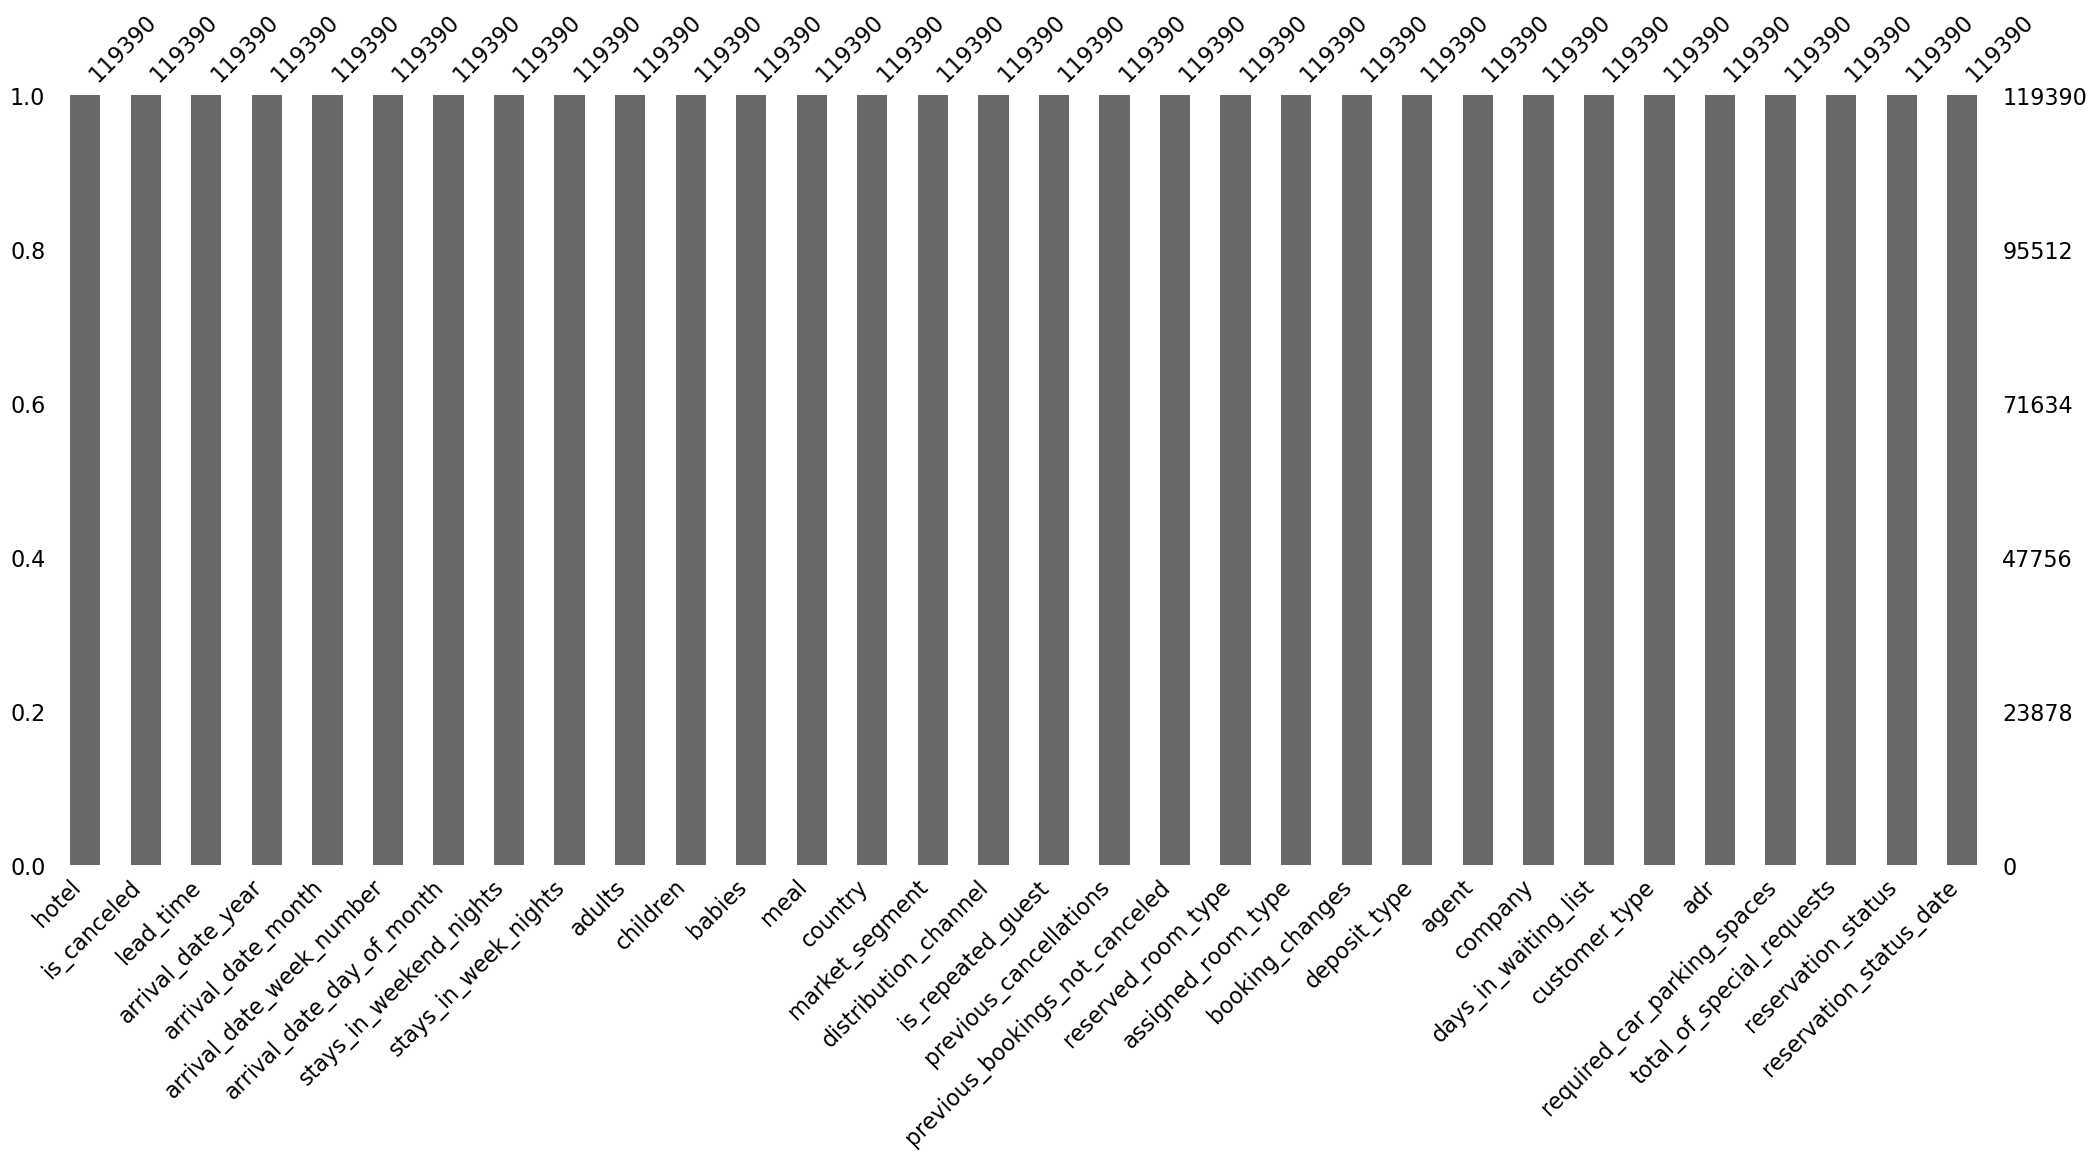

In [9]:
# visualizing null values
msno.bar(df)
plt.show()

As for missing values in children column, as it has very low percentage, later I will drop them directly.

In [10]:
# adults, babies and children cant be zero at same time, so dropping the rows having all these zero at same time

filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [11]:
df = df[~filter]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


# IV. - EXPLORATORY DATA ANALYSIS (EDA)

In [12]:
country_wise_guests = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

,country,No of guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


In [13]:
# Calculate total guests
total_guests = country_wise_guests['No of guests'].sum()

# Get top 5 countries
top_5_countries = country_wise_guests.nlargest(5, 'No of guests')

# Calculate the number of guests from 'others'
others = total_guests - top_5_countries['No of guests'].sum()

# Calculate the percentage
top_5_countries['percentage'] = (top_5_countries['No of guests'] / total_guests) * 100

# Append 'others' to the DataFrame
others_row = pd.DataFrame(data = {
    'country' : ['others'],
    'No of guests' : [others],
    'percentage' : [(others / total_guests) * 100]
})

# Concatenate the DataFrames
country_wise_guests_percentage = pd.concat([top_5_countries, others_row])

country_wise_guests_percentage

,country,No of guests,percentage
0,PRT,20977,27.965232
1,GBR,9668,12.888776
2,FRA,8468,11.289011
3,ESP,6383,8.509419
4,DEU,6067,8.088147
0,others,23448,31.259415


In [14]:
guests_map = px.choropleth(country_wise_guests, 
                        locations = country_wise_guests['country'], 
                        color = country_wise_guests['No of guests'], 
                        hover_name = country_wise_guests['country'],
                        color_continuous_scale = 'speed',
                        labels = {'No of guests':'Number of Guests'},
                        title = 'Guests by Country')

guests_map.update_layout(
    autosize=False,
    width=1000,
    height=600,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="White",
)

guests_map.show()

In [15]:
data = df[df['is_canceled'] == 0]

px.box(data_frame = data, x = 'reserved_room_type', y = 'adr', color = 'hotel')

In [16]:
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]

resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.410104
3,February,54.147478
4,January,48.761125
5,July,150.122528
6,June,107.974850
7,March,57.056838
8,May,76.657558
9,November,48.706289


In [17]:
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.962267
1,August,118.674598
2,December,88.401855
3,February,86.520062
4,January,82.330983
5,July,115.818019
6,June,117.874360
7,March,90.658533
8,May,120.669827
9,November,86.946592


In [18]:
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel

,month,price_for_resort,price_for_city_hotel
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


In [19]:
import sort_dataframeby_monthorweek as sd

def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

In [20]:
final_prices = sort_month(final_hotel, 'month')
final_prices

,month,price_for_resort,price_for_city_hotel
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


In [21]:
plt.figure(figsize = (17, 8))

px.line(final_prices, x = 'month', y = ['price_for_resort','price_for_city_hotel'],
        title = 'Room price per night over the Months')

<Figure size 1700x800 with 0 Axes>

In [22]:
resort_guests = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['month','no of guests']
resort_guests

,month,no of guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [23]:
city_guests = data_city['arrival_date_month'].value_counts().reset_index()
city_guests.columns=['month','no of guests']
city_guests

,month,no of guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [24]:
final_guests = resort_guests.merge(city_guests,on='month')
final_guests.columns=['month','no of guests in resort','no of guest in city hotel']
final_guests

,month,no of guests in resort,no of guest in city hotel
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [25]:
final_guests = sort_month(final_guests,'month')
final_guests

,month,no of guests in resort,no of guest in city hotel
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568
5,June,2037,4358
6,July,3137,4770
7,August,3257,5367
8,September,2102,4283
9,October,2575,4326


In [26]:
px.line(final_guests, x = 'month', y = ['no of guests in resort','no of guest in city hotel'],
        title='Total no of guests per Months')

In [27]:
filter = df['is_canceled'] == 0
data = df[filter]
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [28]:
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [29]:
stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

,total_nights,hotel,Number of stays
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983
...,...,...,...
57,46,Resort Hotel,1
58,48,City Hotel,1
59,56,Resort Hotel,1
60,60,Resort Hotel,1


In [30]:
px.bar(data_frame = stay, x = 'total_nights', y = 'Number of stays', color = 'hotel', barmode = 'group')

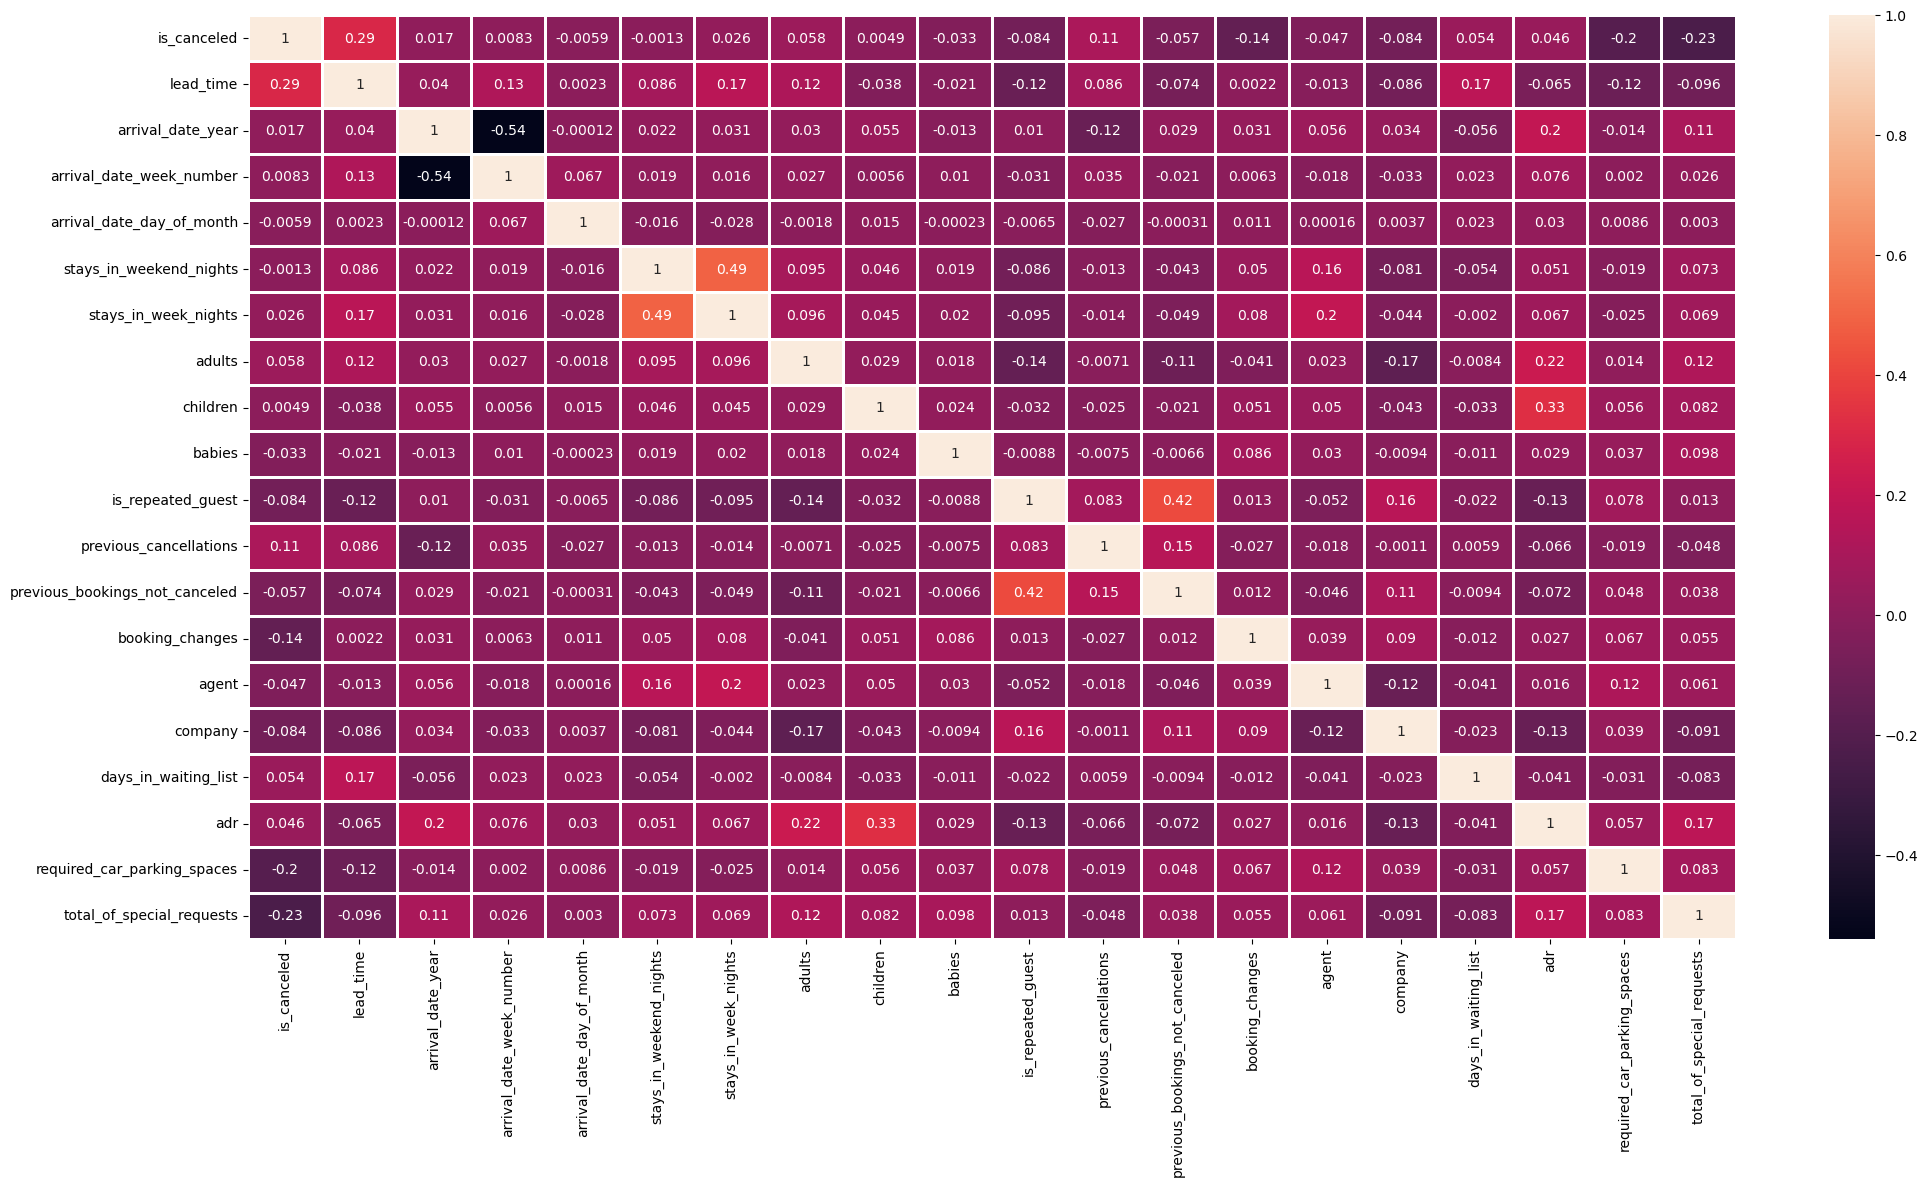

In [31]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize = (24, 12))

# Calculate correlation on numeric columns
corr = numeric_df.corr()

sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [32]:
correlation = numeric_df.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

# V. - FEATURE ENGINEERING

In [33]:
# dropping columns that are not useful

useless_col = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
            'reservation_status', 'country', 'days_in_waiting_list']

df.drop(useless_col, axis = 1, inplace = True)

In [34]:
# creating numerical and categorical dataframes

cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_cols

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [35]:
cat_df = df[cat_cols]
cat_df.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03


In [36]:
cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])

cat_df['year'] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day

cat_df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)

cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3


In [37]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

market_segment: 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

distribution_channel: 
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

reserved_room_type: 
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']

deposit_type: 
['No Deposit' 'Refundable' 'Non Refund']

customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']

year: 
[2015 2014 2016 2017]

month: 
[ 7  5  4  6  3  8  9  1 11 10 12  2]

day: 
[ 1  2  3  6 22 23  5  7  8 11 15 16 29 19 18  9 13  4 12 26 17 10 20 14
 30 28 25 21 27 24 31]



In [38]:
# encoding categorical variables

cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})

cat_df['meal'] = cat_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

cat_df['market_segment'] = cat_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                        'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

cat_df['distribution_channel'] = cat_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                    'GDS': 4})

cat_df['reserved_room_type'] = cat_df['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                'L': 7, 'B': 8})

cat_df['deposit_type'] = cat_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

cat_df['customer_type'] = cat_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

cat_df['year'] = cat_df['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})

cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,0,0,0,0,0,0,0,0,7,1
1,0,0,0,0,0,0,0,0,7,1
2,0,0,0,0,1,0,0,0,7,2
3,0,0,1,1,1,0,0,0,7,2
4,0,0,2,2,1,0,0,0,7,3


In [39]:
num_df = df.drop(columns = cat_cols, axis = 1)
num_df.drop('is_canceled', axis = 1, inplace = True)
num_df

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,342,27,1,0,0,2,0.0,0,0,0,0,0.0,0.0,0.00,0,0
1,737,27,1,0,0,2,0.0,0,0,0,0,0.0,0.0,0.00,0,0
2,7,27,1,0,1,1,0.0,0,0,0,0,0.0,0.0,75.00,0,0
3,13,27,1,0,1,1,0.0,0,0,0,0,304.0,0.0,75.00,0,0
4,14,27,1,0,2,2,0.0,0,0,0,0,240.0,0.0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,35,30,2,5,2,0.0,0,0,0,0,394.0,0.0,96.14,0,0
119386,102,35,31,2,5,3,0.0,0,0,0,0,9.0,0.0,225.43,0,2
119387,34,35,31,2,5,2,0.0,0,0,0,0,9.0,0.0,157.71,0,4
119388,109,35,31,2,5,2,0.0,0,0,0,0,89.0,0.0,104.40,0,0


In [40]:
num_df.var()

lead_time                         11422.361808
arrival_date_week_number            184.990111
arrival_date_day_of_month            77.107192
stays_in_weekend_nights               0.990258
stays_in_week_nights                  3.599010
adults                                0.330838
children                              0.159070
babies                                0.009508
is_repeated_guest                     0.030507
previous_cancellations                0.713887
previous_bookings_not_canceled        2.244415
agent                             11485.169679
company                            2897.684308
adr                                2543.589039
required_car_parking_spaces           0.060201
total_of_special_requests             0.628652
dtype: float64

In [41]:
# normalizing numerical variables

num_df['lead_time'] = np.log(num_df['lead_time'] + 1)
num_df['arrival_date_week_number'] = np.log(num_df['arrival_date_week_number'] + 1)
num_df['arrival_date_day_of_month'] = np.log(num_df['arrival_date_day_of_month'] + 1)
num_df['agent'] = np.log(num_df['agent'] + 1)
num_df['company'] = np.log(num_df['company'] + 1)
num_df['adr'] = np.log(num_df['adr'] + 1)

In [42]:
num_df.var()

lead_time                         2.582757
arrival_date_week_number          0.440884
arrival_date_day_of_month         0.506325
stays_in_weekend_nights           0.990258
stays_in_week_nights              3.599010
adults                            0.330838
children                          0.159070
babies                            0.009508
is_repeated_guest                 0.030507
previous_cancellations            0.713887
previous_bookings_not_canceled    2.244415
agent                             3.535793
company                           1.346883
adr                               0.515480
required_car_parking_spaces       0.060201
total_of_special_requests         0.628652
dtype: float64

In [43]:
num_df['adr'] = num_df['adr'].fillna(value = num_df['adr'].mean())

In [44]:
num_df.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,5.837730,3.332205,0.693147,0,0,2,0.0,0,0,0,0,0.000000,0.0,0.000000,0,0
1,6.603944,3.332205,0.693147,0,0,2,0.0,0,0,0,0,0.000000,0.0,0.000000,0,0
2,2.079442,3.332205,0.693147,0,1,1,0.0,0,0,0,0,0.000000,0.0,4.330733,0,0
3,2.639057,3.332205,0.693147,0,1,1,0.0,0,0,0,0,5.720312,0.0,4.330733,0,0
4,2.708050,3.332205,0.693147,0,2,2,0.0,0,0,0,0,5.484797,0.0,4.595120,0,1


In [45]:
X = pd.concat([cat_df, num_df], axis = 1)
y = df['is_canceled']

In [46]:
X.shape, y.shape

((119210, 26), (119210,))

In [47]:
# splitting data into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

# VI. - MODEL DEFINITION

In [48]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy Score of K-Nearest Neighbors is : {acc_knn}")
print(f"Confusion Matrix : \n{confusion_matrix(y_test, y_pred_knn)}")
print(f"Classification Report : \n{classification_report(y_test, y_pred_knn)}")

# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy Score of Support Vector Machine is : {acc_svm}")
print(f"Confusion Matrix : \n{confusion_matrix(y_test, y_pred_svm)}")
print(f"Classification Report : \n{classification_report(y_test, y_pred_svm)}")

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy Score of Decision Tree is : {acc_dt}")
print(f"Confusion Matrix : \n{confusion_matrix(y_test, y_pred_dt)}")
print(f"Classification Report : \n{classification_report(y_test, y_pred_dt)}")

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy Score of Random Forest is : {acc_rf}")
print(f"Confusion Matrix : \n{confusion_matrix(y_test, y_pred_rf)}")
print(f"Classification Report : \n{classification_report(y_test, y_pred_rf)}")

# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
acc_gb = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy Score of Gradient Boosting is : {acc_gb}")
print(f"Confusion Matrix : \n{confusion_matrix(y_test, y_pred_gb)}")
print(f"Classification Report : \n{classification_report(y_test, y_pred_gb)}")

Accuracy Score of K-Nearest Neighbors is : 0.8906411654503258
Confusion Matrix : 
[[21707   803]
 [ 3108 10145]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.96      0.92     22510
           1       0.93      0.77      0.84     13253

    accuracy                           0.89     35763
   macro avg       0.90      0.86      0.88     35763
weighted avg       0.89      0.89      0.89     35763

Accuracy Score of Support Vector Machine is : 0.8569191622626737
Confusion Matrix : 
[[22299   211]
 [ 4906  8347]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.82      0.99      0.90     22510
           1       0.98      0.63      0.77     13253

    accuracy                           0.86     35763
   macro avg       0.90      0.81      0.83     35763
weighted avg       0.88      0.86      0.85     35763

Accuracy Score of Decision Tree is : 0.9496406900987053
Confusion M

In [49]:
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

for name, model in models.items():
    start_time = time.time()
    
    # Training the model
    model.fit(X_train, y_train)
    
    # Making predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculating precision scores
    train_precision = precision_score(y_train, y_pred_train, average='weighted')
    test_precision = precision_score(y_test, y_pred_test, average='weighted')
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    print(f"{name}:")
    print(f"Training Precision Score: {train_precision}")
    print(f"Test Precision Score: {test_precision}")
    print(f"Time taken: {elapsed_time} seconds")
    print("\n")

K-Nearest Neighbors:
Training Precision Score: 0.9274271633534035
Test Precision Score: 0.8939862350048461
Time taken: 13.048023223876953 seconds


Support Vector Machine:
Training Precision Score: 0.8778945690336346
Test Precision Score: 0.8773568733880892
Time taken: 636.7160799503326 seconds


Decision Tree:
Training Precision Score: 1.0
Test Precision Score: 0.9505405980177476
Time taken: 0.9765427112579346 seconds


Random Forest:
Training Precision Score: 0.9999640510912976
Test Precision Score: 0.9550302126507934
Time taken: 14.00639533996582 seconds


Gradient Boosting:
Training Precision Score: 0.9092591986904875
Test Precision Score: 0.9085621337456738
Time taken: 13.061296939849854 seconds




In [48]:
# Train a Random Forest classifier
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [49]:
# Use TreeExplainer to explain test set predictions
explainer = shap.TreeExplainer(rf)

In [50]:
shap_values = explainer.shap_values(X_test.iloc[[0]])

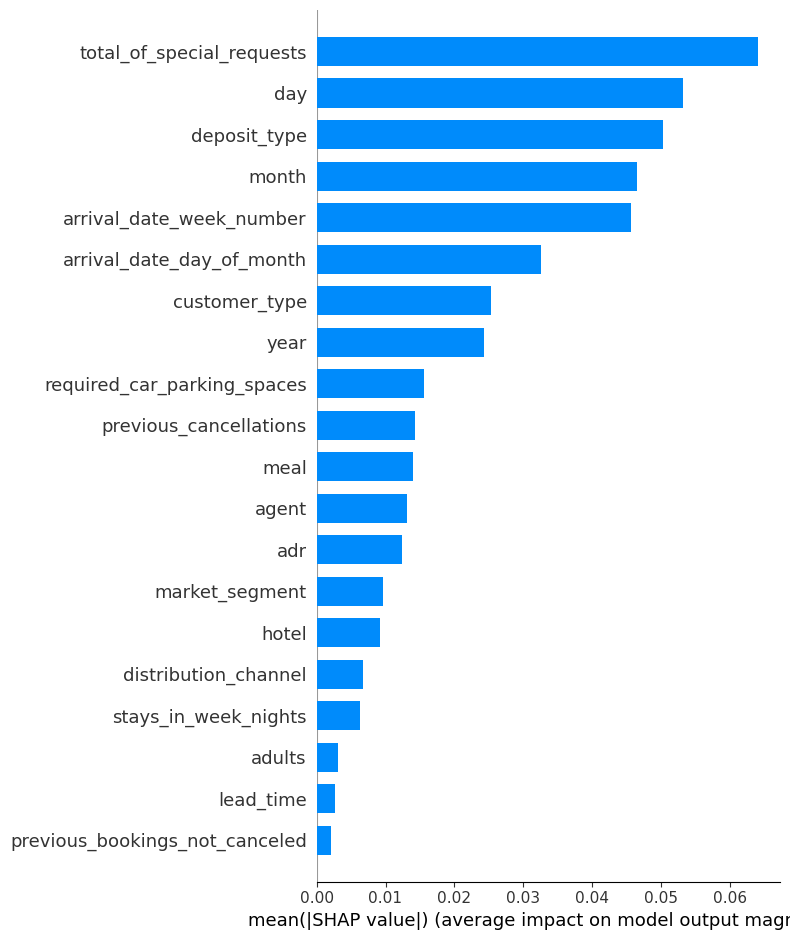

In [51]:
# Plot the SHAP values for the positive class
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

In [52]:
# Calculate and print the mean absolute SHAP values for each feature
mean_shap_values = np.abs(shap_values[1]).mean(axis=0)
for feature, mean_shap_value in zip(X_test.columns, mean_shap_values):
    print(f"{feature}: {mean_shap_value}")

hotel: 0.009229576717108693
meal: 0.014029474727498568
market_segment: 0.009583339808080809
distribution_channel: 0.006678672089505456
reserved_room_type: 0.0013385728991688424
deposit_type: 0.05027714302289948
customer_type: 0.02525442487398559
year: 0.0243562885315126
month: 0.04644385459410203
day: 0.053100533139332134
lead_time: 0.0026973692703506935
arrival_date_week_number: 0.04564421213300394
arrival_date_day_of_month: 0.032507252508155476
stays_in_weekend_nights: 0.0015998271381447544
stays_in_week_nights: 0.006356536489854312
adults: 0.003082438260383034
children: 0.001956150125226114
babies: 9.092124801715414e-05
is_repeated_guest: 0.0008801702728571703
previous_cancellations: 0.01433028302417176
previous_bookings_not_canceled: 0.0020469674625104763
agent: 0.013159043266071877
company: 0.0007077032595095906
adr: 0.012385964597923991
required_car_parking_spaces: 0.01554298038309261
total_of_special_requests: 0.06402387063382944


In [53]:
# Your original SHAP values
shap_values = {
    'hotel': 0.024105642775062632,
    'meal': 0.0011838709159961284,
    'market_segment': 0.03335853947521993,
    'distribution_channel': 0.051827592987984596,
    'reserved_room_type': 0.005663546267676127,
    'deposit_type': 0.06255517322547485,
    'customer_type': 0.0008123860177936771,
    'year': 0.0061721020548378665,
    'month': 0.05047394907635863,
    'day': 0.029827634423116086,
    'lead_time': 0.08971551750323095,
    'arrival_date_week_number': 0.0065931100767841234,
    'arrival_date_day_of_month': 0.0037777110678335543,
    'stays_in_weekend_nights': 0.004702210968517681,
    'stays_in_week_nights': 0.019599691867036643,
    'adults': 0.003496407875269231,
    'children': 0.000996227827387093,
    'babies': 0.0002654618193375646,
    'is_repeated_guest': 0.0026739768761664066,
    'previous_cancellations': 0.0202464029972163,
    'previous_bookings_not_canceled': 0.0020563346999779423,
    'agent': 0.05164744784772945,
    'company': 0.0028454269344030106,
    'adr': 0.04240094568304944,
    'required_car_parking_spaces': 0.01959900317093158,
    'total_of_special_requests': 0.02840374233138757
}

# Sort the features by SHAP values
sorted_shap_values = dict(sorted(shap_values.items(), key=lambda item: item[1], reverse=True))

# Keep the top 5
top_5 = dict(list(sorted_shap_values.items())[:5])

# Sum the rest as 'others'
others = sum(list(sorted_shap_values.values())[5:])
top_5['others'] = others

top_5

{'lead_time': 0.08971551750323095,
 'deposit_type': 0.06255517322547485,
 'distribution_channel': 0.051827592987984596,
 'agent': 0.05164744784772945,
 'month': 0.05047394907635863,
 'others': 0.2587803761250006}

# VIII. - MODEL EVALUATION

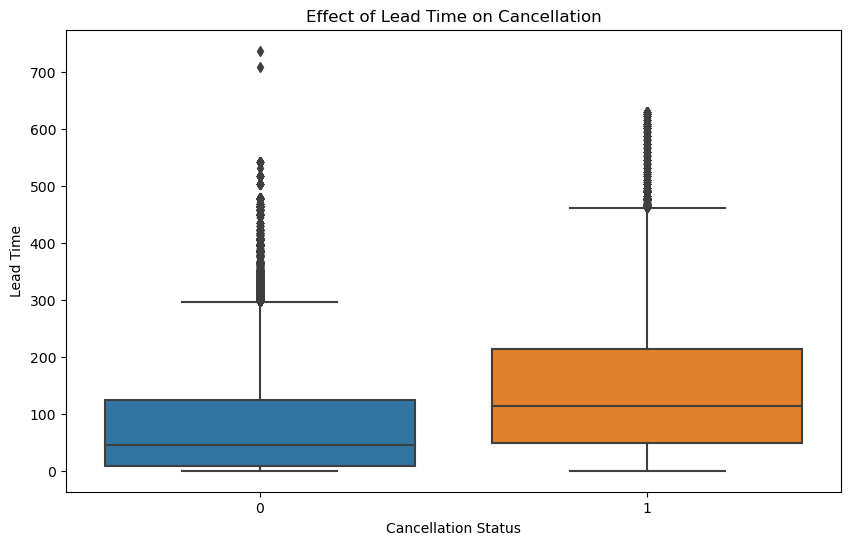

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Box plot
sns.boxplot(x='is_canceled', y='lead_time', data=df)

# Or violin plot
# sns.violinplot(x='is_canceled', y='lead_time', data=df)

plt.title('Effect of Lead Time on Cancellation')
plt.xlabel('Cancellation Status')
plt.ylabel('Lead Time')
plt.show()

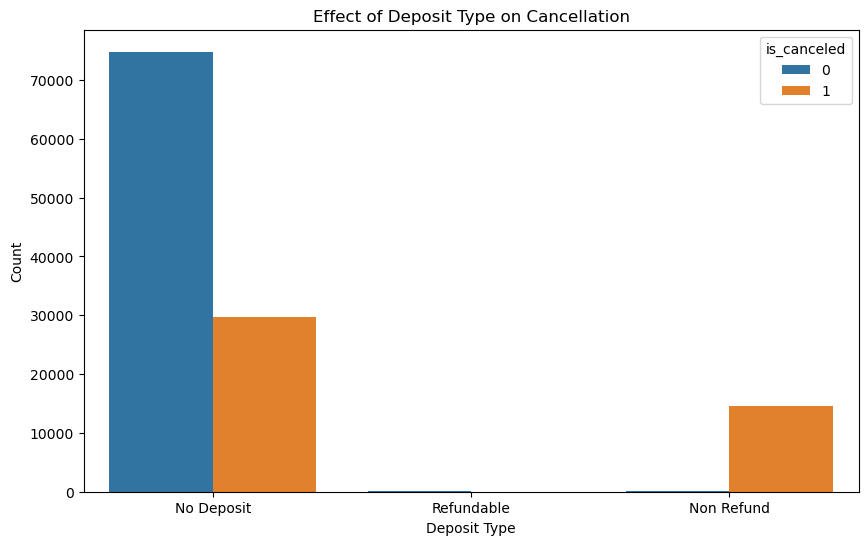

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Count plot
sns.countplot(x='deposit_type', hue='is_canceled', data=df)

plt.title('Effect of Deposit Type on Cancellation')
plt.xlabel('Deposit Type')
plt.ylabel('Count')
plt.show()


In [61]:
# Assuming 'df' is your DataFrame, 'is_canceled' and 'deposit_type' are your columns
grouped_counts = df.groupby(['deposit_type', 'is_canceled']).size()

# Calculate the total number of bookings for each deposit type
total_per_deposit_type = df['deposit_type'].value_counts()

# Calculate the cancellation rate for each deposit type
cancellation_rate = grouped_counts / total_per_deposit_type * 100

print(cancellation_rate)

deposit_type  is_canceled
No Deposit    0              71.598013
              1              28.401987
Non Refund    0               0.637554
              1              99.362446
Refundable    0              77.777778
              1              22.222222
dtype: float64


In [63]:
# Assuming 'df' is your DataFrame, 'is_canceled' and 'deposit_type' are your columns
grouped_counts = df.groupby(['total_of_special_requests', 'is_canceled']).size()

# Calculate the total number of bookings for each deposit type
total_per_deposit_type = df['total_of_special_requests'].value_counts()

# Calculate the cancellation rate for each deposit type
cancellation_rate = grouped_counts / total_per_deposit_type * 100

print(cancellation_rate)

total_of_special_requests  is_canceled
0                          0              52.231450
                           1              47.768550
1                          0              77.952566
                           1              22.047434
2                          0              77.872143
                           1              22.127857
3                          0              82.157177
                           1              17.842823
4                          0              89.411765
                           1              10.588235
5                          0              95.000000
                           1               5.000000
dtype: float64


In [65]:
# Assuming 'df' is your DataFrame, 'is_canceled' and 'deposit_type' are your columns
grouped_counts = df.groupby(['customer_type', 'is_canceled']).size()

# Calculate the total number of bookings for each deposit type
total_per_deposit_type = df['customer_type'].value_counts()

# Calculate the cancellation rate for each deposit type
cancellation_rate = grouped_counts / total_per_deposit_type * 100

print(cancellation_rate)

customer_type    is_canceled
Contract         0              69.007859
                 1              30.992141
Group            0              89.895470
                 1              10.104530
Transient        0              59.213644
                 1              40.786356
Transient-Party  0              74.549585
                 1              25.450415
dtype: float64


In [71]:
# Assuming 'df' is your DataFrame, 'is_canceled' and 'deposit_type' are your columns
grouped_counts = df.groupby(['arrival_date_month', 'is_canceled']).size()

# Calculate the total number of bookings for each deposit type
total_per_deposit_type = df['arrival_date_month'].value_counts()

# Calculate the cancellation rate for each deposit type
cancellation_rate = grouped_counts

print(cancellation_rate)

arrival_date_month  is_canceled
April               0              6560
                    1              4518
August              0              8624
                    1              5237
December            0              4391
                    1              2368
February            0              5359
                    1              2693
January             0              4115
                    1              1806
July                0              7907
                    1              4737
June                0              6395
                    1              4534
March               0              6620
                    1              3148
May                 0              7103
                    1              4677
November            0              4651
                    1              2120
October             0              6901
                    1              4246
September           0              6385
                    1              4115
dtype: i

# X. - MODEL ANALYSIS

# XI. - MODEL SAVING

# XII. - MODEL INFERENCE

# XIII. - Conclusion